In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the cleaned dataset
df = pd.read_csv("cleaned_weather_data.csv")  # Adjust filename if different

# Convert 'last_updated' to datetime
df['last_updated'] = pd.to_datetime(df['last_updated'])


Goal: Identify unusual or rare events/outliers in the time series data.

Approaches:

Use statistical methods (e.g., Z-score or IQR) to detect anomalies.

Use model-based approaches, such as Isolation Forest, Local Outlier Factor (LOF), or One-Class SVM.

Use time series decomposition (trend, seasonality, residual) and treat large residuals as anomalies.

Use LSTM Autoencoders to detect unusual sequences.

In [8]:
from sklearn.ensemble import IsolationForest

# Define numeric columns
numeric_cols = df.select_dtypes(include='number').columns

# Apply Isolation Forest
model = IsolationForest(contamination=0.01, random_state=42)
df['anomaly'] = model.fit_predict(df[numeric_cols])

# Convert -1 to 1 (anomaly), 1 to 0 (normal)
df['anomaly'] = df['anomaly'].map({1: 0, -1: 1})


In [13]:
print(df.columns)


Index(['country', 'location_name', 'latitude', 'longitude', 'timezone',
       'last_updated_epoch', 'last_updated', 'temperature_celsius',
       'temperature_fahrenheit', 'condition_text', 'wind_mph', 'wind_kph',
       'wind_degree', 'wind_direction', 'pressure_mb', 'pressure_in',
       'precip_mm', 'precip_in', 'humidity', 'cloud', 'feels_like_celsius',
       'feels_like_fahrenheit', 'visibility_km', 'visibility_miles',
       'uv_index', 'gust_mph', 'gust_kph', 'air_quality_Carbon_Monoxide',
       'air_quality_Ozone', 'air_quality_Nitrogen_dioxide',
       'air_quality_Sulphur_dioxide', 'air_quality_PM2.5', 'air_quality_PM10',
       'air_quality_us-epa-index', 'air_quality_gb-defra-index', 'sunrise',
       'sunset', 'moonrise', 'moonset', 'moon_phase', 'moon_illumination',
       'anomaly'],
      dtype='object')


Visualization

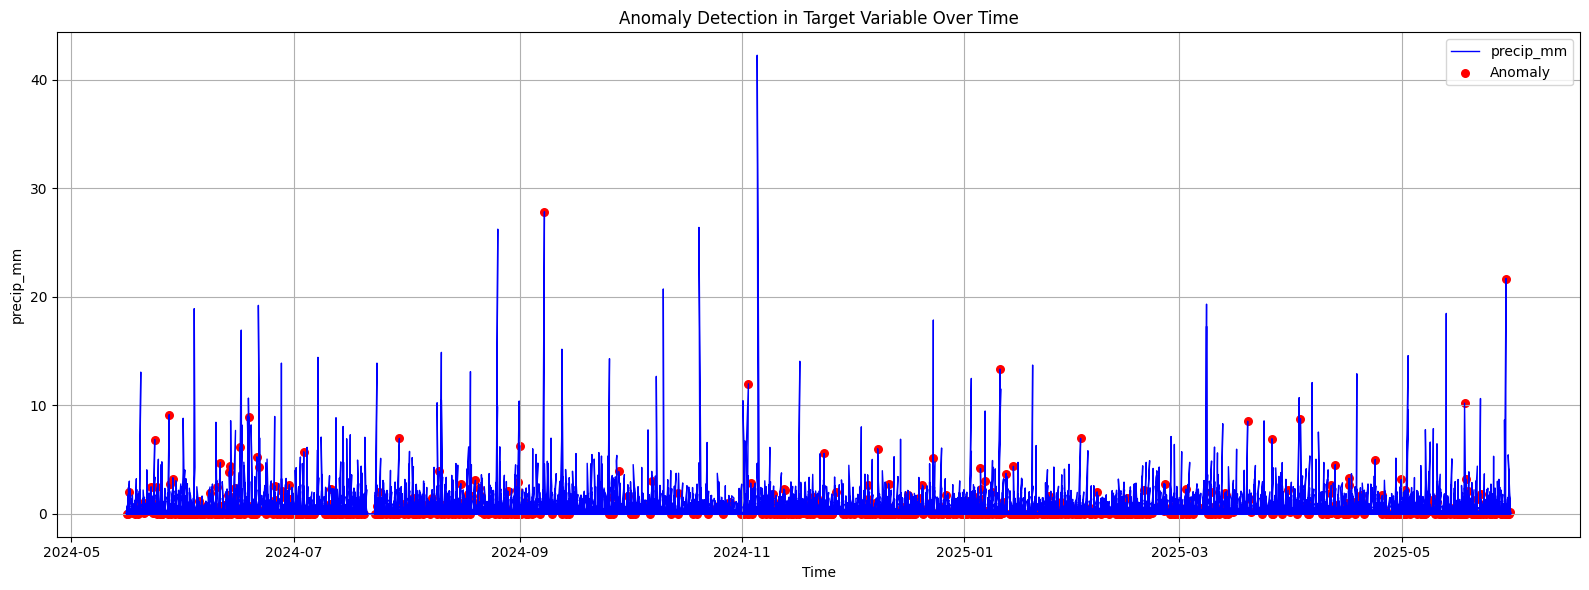

In [17]:
import matplotlib.pyplot as plt

# Ensure 'last_updated' is datetime type for plotting
df['last_updated'] = pd.to_datetime(df['last_updated'])

plt.figure(figsize=(16,6))
plt.plot(df['last_updated'], df['precip_mm'], label='precip_mm', color='blue', linewidth=1)
plt.scatter(df.loc[df['anomaly'] == 1, 'last_updated'], 
            df.loc[df['anomaly'] == 1, 'precip_mm'], 
            color='red', label='Anomaly', s=30)

plt.title('Anomaly Detection in Target Variable Over Time')
plt.xlabel('Time')
plt.ylabel('precip_mm')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


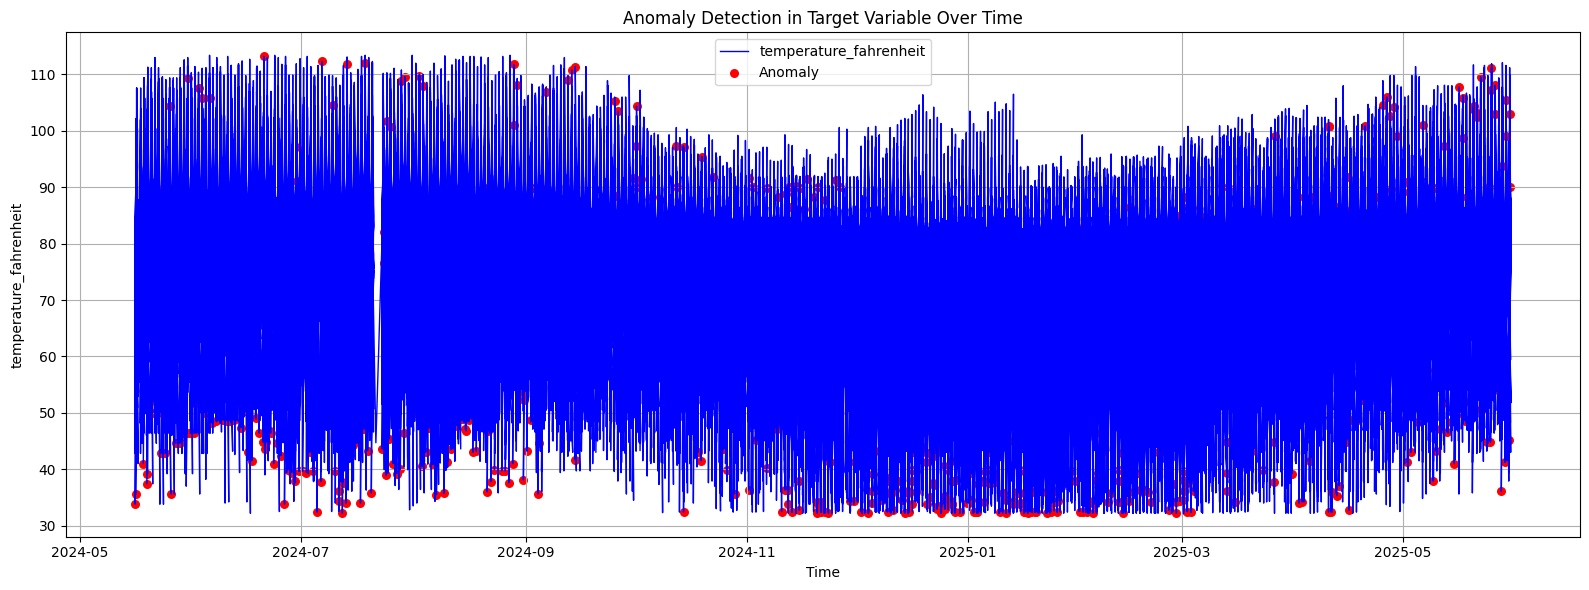

In [18]:
import matplotlib.pyplot as plt

# Ensure 'last_updated' is datetime type for plotting
df['last_updated'] = pd.to_datetime(df['last_updated'])

plt.figure(figsize=(16,6))
plt.plot(df['last_updated'], df['temperature_fahrenheit'], label='temperature_fahrenheit', color='blue', linewidth=1)
plt.scatter(df.loc[df['anomaly'] == 1, 'last_updated'], 
            df.loc[df['anomaly'] == 1, 'temperature_fahrenheit'], 
            color='red', label='Anomaly', s=30)

plt.title('Anomaly Detection in Target Variable Over Time')
plt.xlabel('Time')
plt.ylabel('temperature_fahrenheit')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


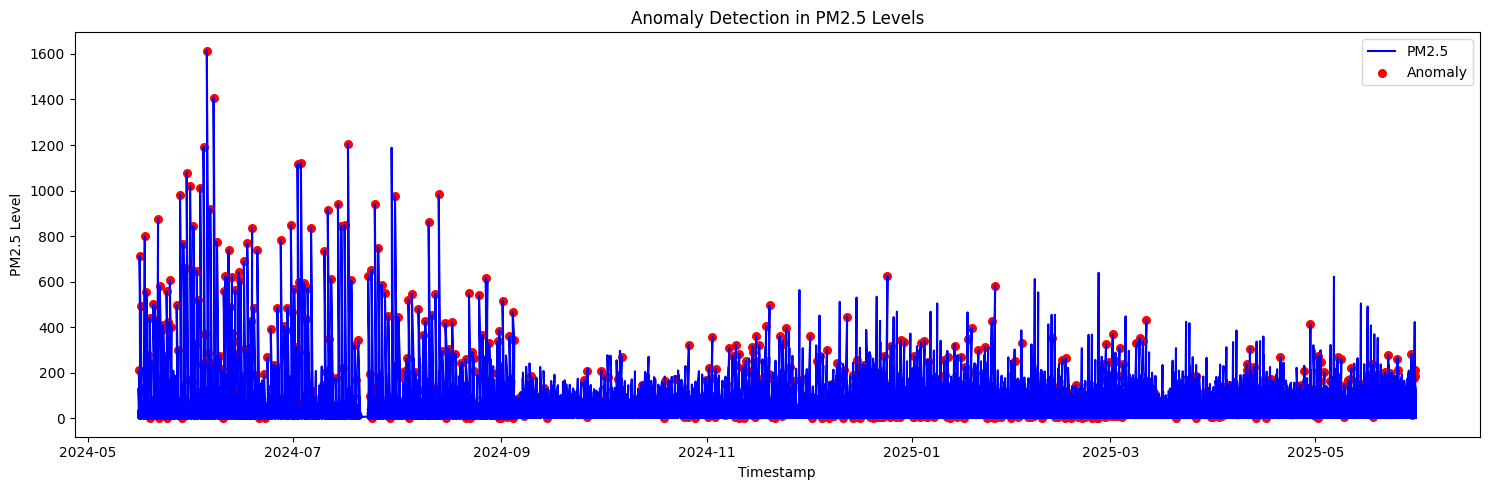

In [21]:
plt.figure(figsize=(15, 5))
plt.plot(df['last_updated'], df['air_quality_PM2.5'], label='PM2.5', color='blue')
plt.scatter(
    df.loc[df['anomaly'] == 1, 'last_updated'], 
    df.loc[df['anomaly'] == 1, 'air_quality_PM2.5'], 
    color='red', label='Anomaly', s=30
)
plt.xlabel('Timestamp')
plt.ylabel('PM2.5 Level')
plt.title('Anomaly Detection in PM2.5 Levels')
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
plt.figure(figsize=(15, 5))
plt.plot(df['last_updated'], df['uv_index'], label='PM2.5', color='blue')
plt.scatter(
    df.loc[df['anomaly'] == 1, 'last_updated'], 
    df.loc[df['anomaly'] == 1, 'uv_index'], 
    color='red', label='Anomaly', s=30
)
plt.xlabel('Timestamp')
plt.ylabel('uv_index')
plt.title('Anomaly Detection in uv_index')
plt.legend()
plt.tight_layout()
plt.show()
